## importing libraries

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [185]:
df=pd.read_csv('newyork.csv')

## Checking for Null values

In [186]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10496
reviews_per_month                 10496
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43566
dtype: int64

### Summary of the dataset

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43566 non-null  int64  
 1   name                            43566 non-null  object 
 2   host_id                         43566 non-null  int64  
 3   host_name                       43561 non-null  object 
 4   neighbourhood_group             43566 non-null  object 
 5   neighbourhood                   43566 non-null  object 
 6   latitude                        43566 non-null  float64
 7   longitude                       43566 non-null  float64
 8   room_type                       43566 non-null  object 
 9   price                           43566 non-null  int64  
 10  minimum_nights                  43566 non-null  int64  
 11  number_of_reviews               43566 non-null  int64  
 12  last_review                     

In [188]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.356600e+04,4.356600e+04,43566.000000,43566.000000,43566.000000,43566.000000,43566.000000,33070.000000,43566.000000,43566.000000,43566.000000,0.0
mean,2.582283e+17,1.559275e+08,40.728677,-73.943917,225.216109,18.700271,26.368544,1.219748,30.934857,136.998256,7.882110,NaN
std,3.605864e+17,1.655706e+08,0.057564,0.056336,818.738268,27.804388,57.740520,1.777084,99.108628,137.346191,18.250976,NaN
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.021553e+07,1.647671e+07,40.687650,-73.981990,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000,NaN
50%,4.561689e+07,7.846297e+07,40.724524,-73.952720,136.000000,15.000000,5.000000,0.550000,1.000000,89.000000,1.000000,NaN
75%,6.797858e+17,2.789252e+08,40.762750,-73.924150,228.000000,30.000000,24.000000,1.800000,5.000000,278.000000,8.000000,NaN
max,9.059818e+17,5.180219e+08,40.911380,-73.710870,90120.000000,1250.000000,2024.000000,63.950000,569.000000,365.000000,1128.000000,NaN


In [189]:
df.describe(include=['bool','object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,43566,43561,43566,43566,43566,33070
unique,13552,9797,5,223,4,2858
top,Rental unit in New York · 1 bedroom · 1 bed · ...,Blueground,Manhattan,Bedford-Stuyvesant,Entire home/apt,2023-05-21
freq,1990,569,18107,3175,24649,1250


### Processing Data

-Replacing the null values with 0

In [190]:
df['reviews_per_month'].fillna(0,inplace=True)

-Dropping the velues of columns because all license column is Null ,more then 14000 values in last_review column is Null

In [191]:
df.drop(['host_name','id','name','license','last_review'],axis=1,inplace=True)

Checking the Dublicated values

In [192]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [193]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

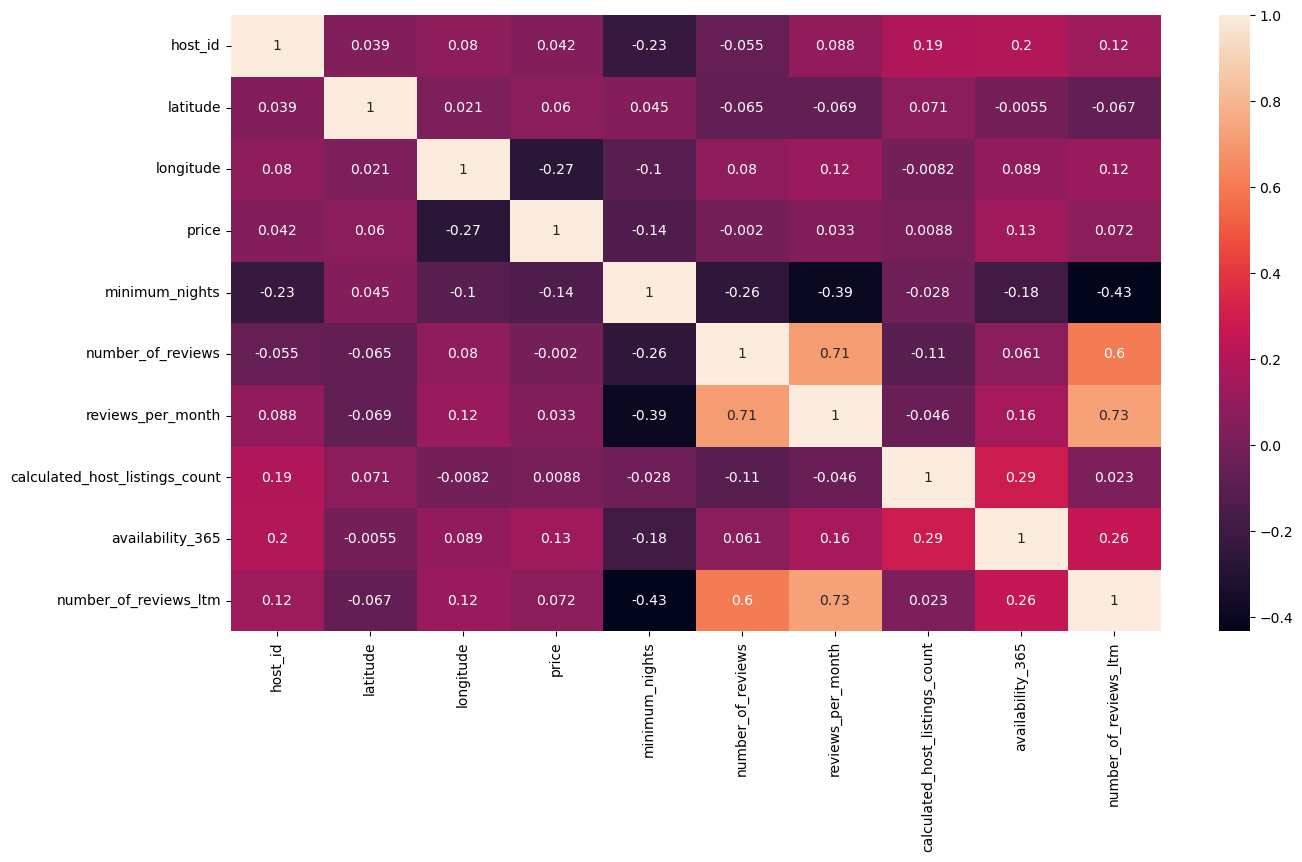

In [194]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
df.columns

# Univariate Analysis


### neighbourhood Groups

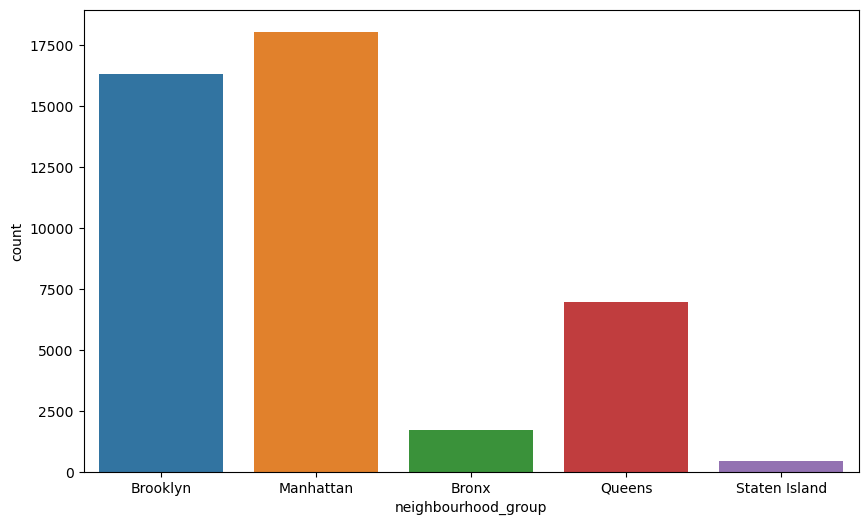

In [195]:
plt.figure(figsize=(10, 6))
axis = sns.countplot(data=df, x='neighbourhood_group')
plt.show()

### Number of different room types

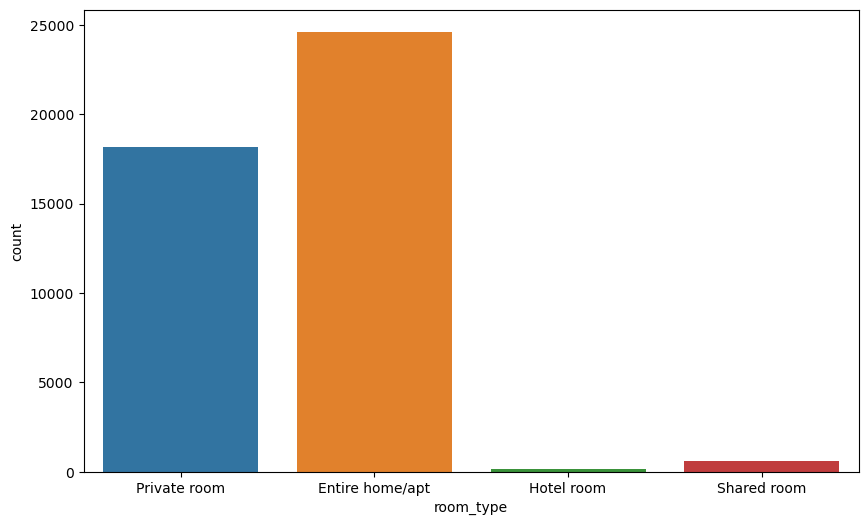

In [196]:
 plt.figure(figsize=(10, 6))
axis = sns.countplot(data=df, x='room_type')
plt.show()

### Distribution of neighbourhood

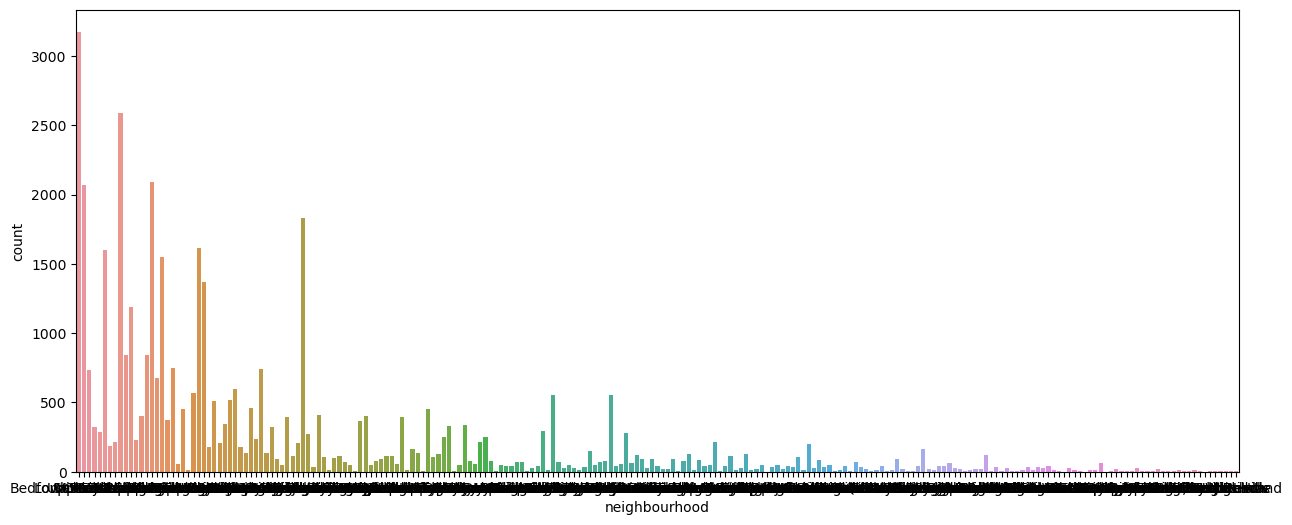

In [197]:
 plt.figure(figsize=(15, 6))
axis = sns.countplot(data=df, x='neighbourhood')
plt.show()

### Relation between neighbourgroup and Availability of Room¶


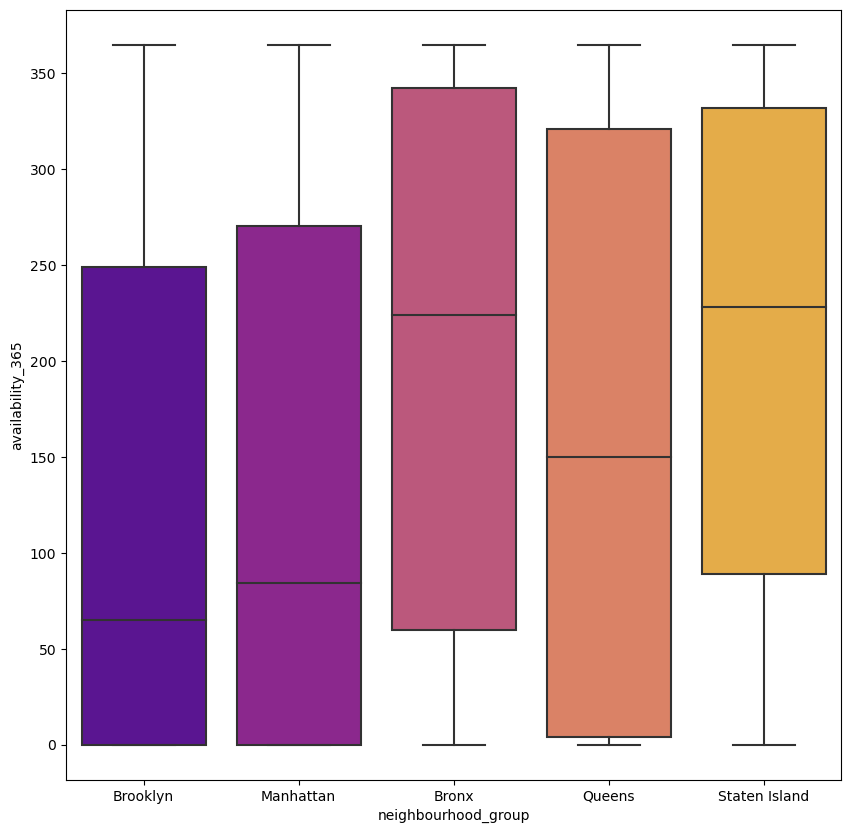

In [198]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

### Distribution of Availability of rooms


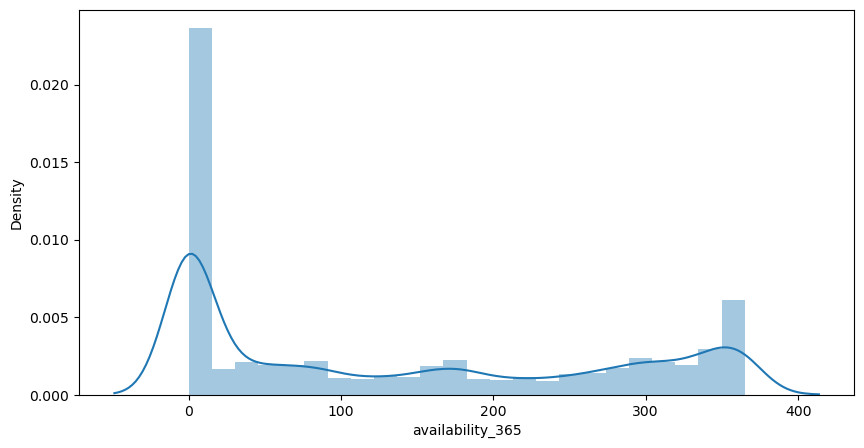

In [199]:
fig,axis = plt.subplots(figsize=(10,5))
axis = sns.distplot(df.availability_365)
plt.show()

### Realtion between price and Private rooms

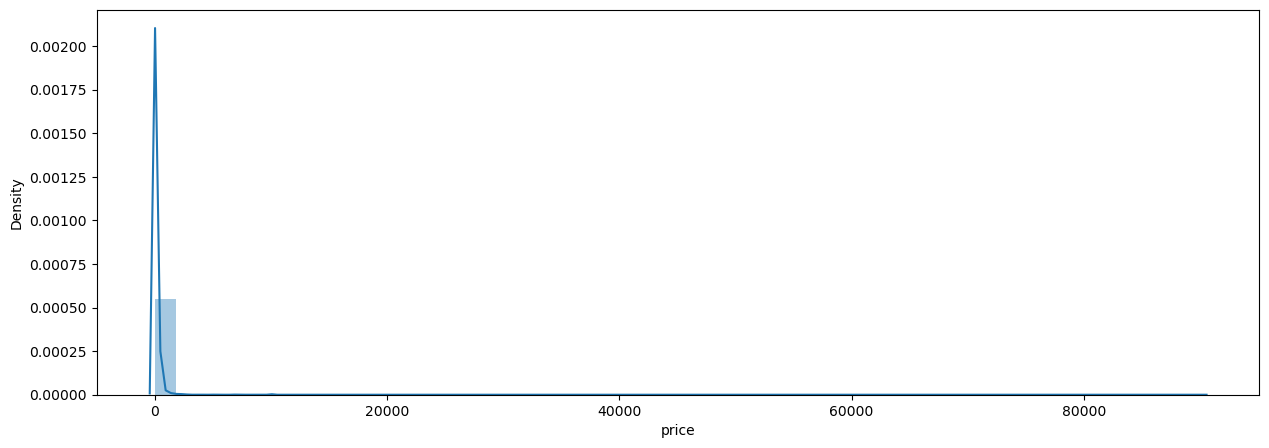

In [200]:
df1 = df[df.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

###  Realtion between price and Sharedrooms

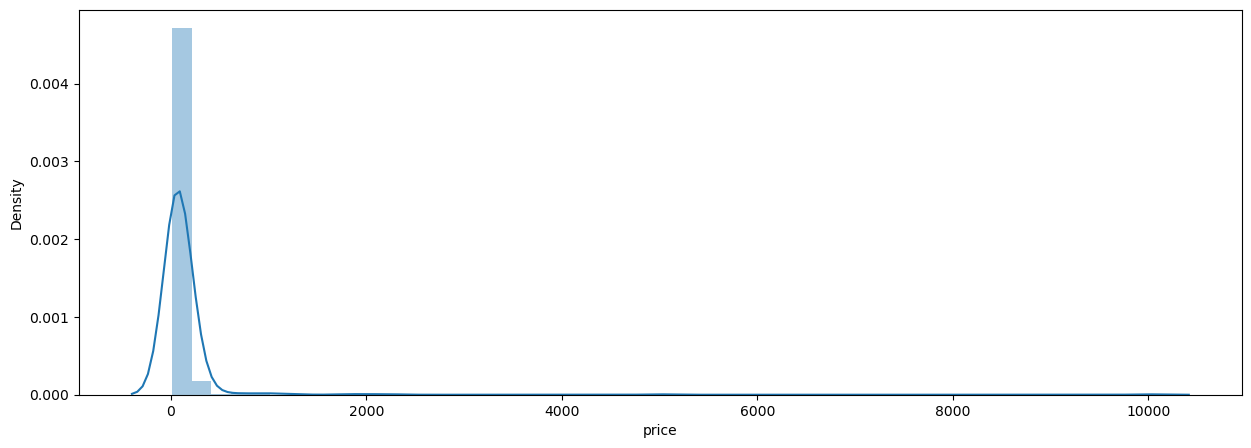

In [201]:
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

###  Realtion between price and Entire home/apt rooms

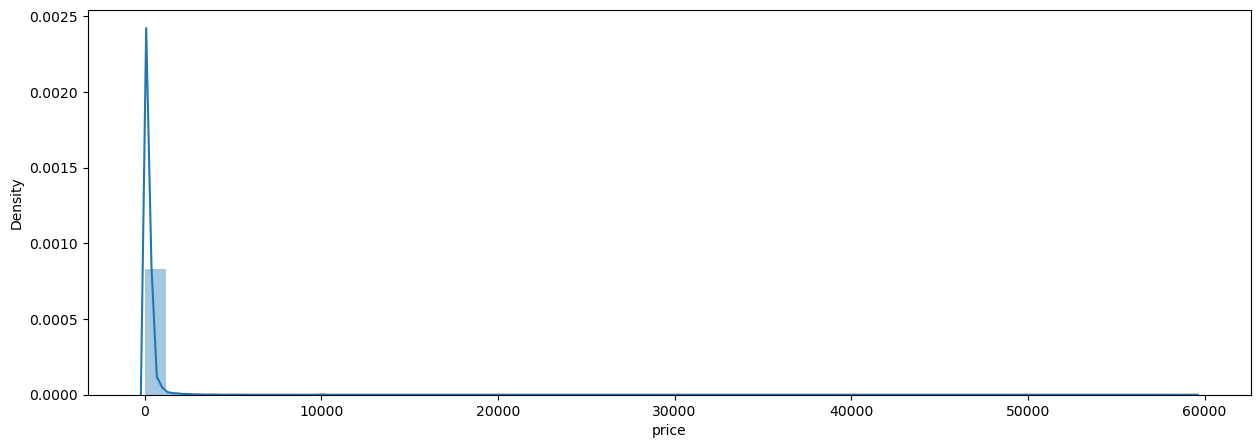

In [202]:
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

### Distribution of Availability of rooms

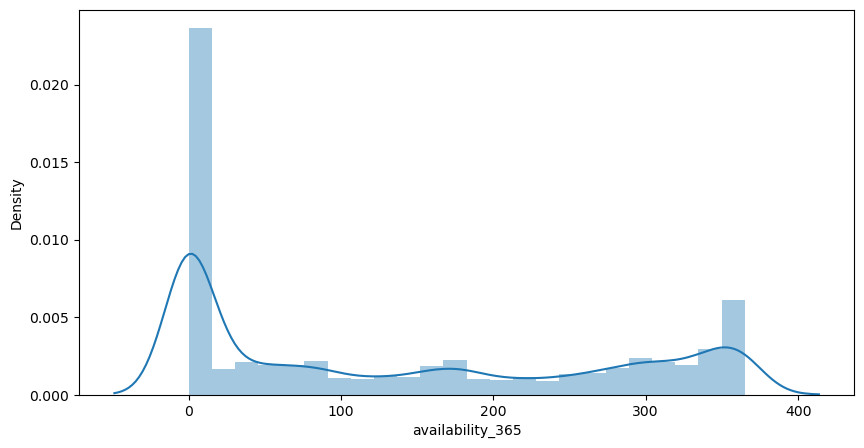

In [203]:
fig,axis = plt.subplots(figsize=(10,5))
axis = sns.distplot(df.availability_365)
plt.show()

# Bivariate Analysis


### Map Availability of Room¶


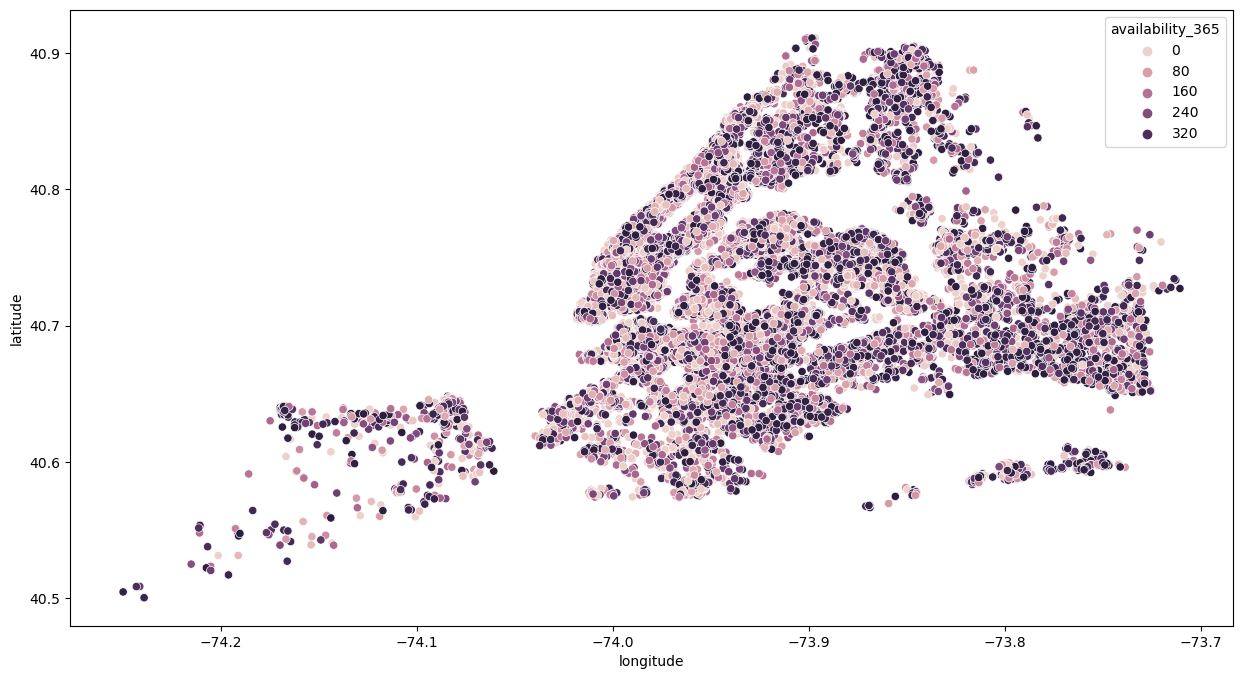

In [204]:
fig,axis = plt.subplots(figsize=(15,8))
axis = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365)
plt.show()

### Map of Neighbourhood group¶


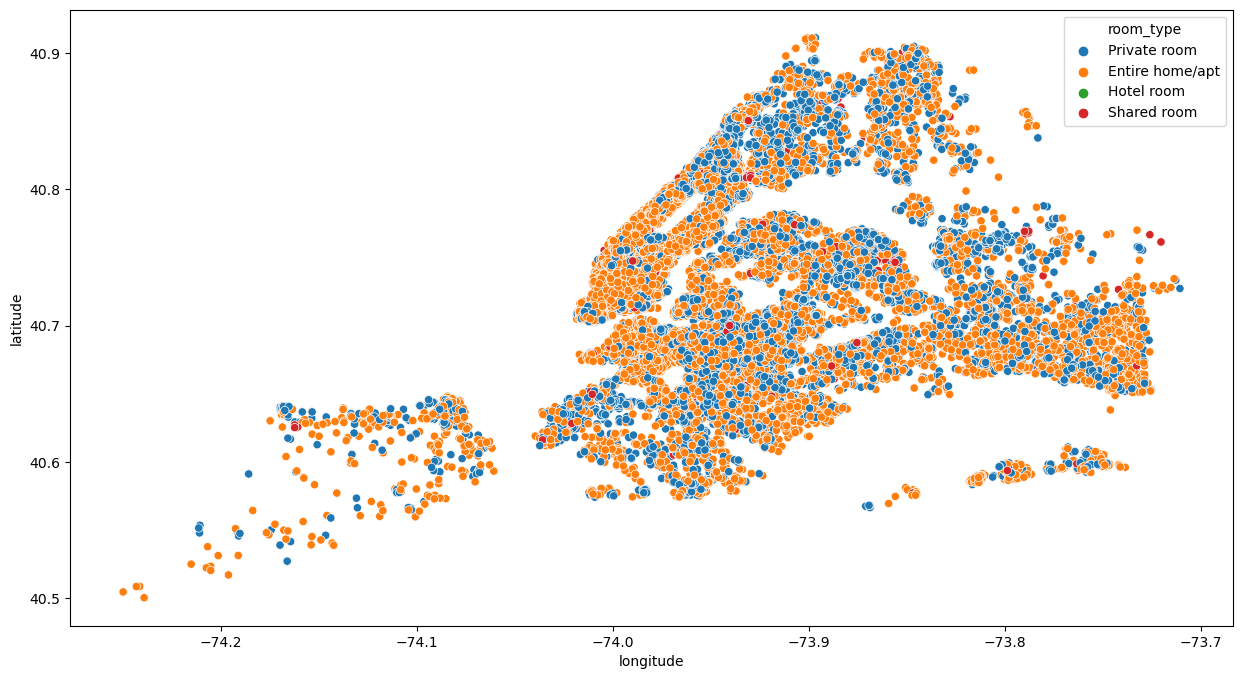

In [205]:
fig,axis = plt.subplots(figsize=(15,8))
axis = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.room_type)
plt.show()